In [21]:
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

In [43]:
texto1 = "adoro festa junina"
texto2 = "odeio festa junina"
texto3 = "big brother brasil é legal"
texto4 = "big brother brasil é chato"
corpus = [texto1, texto2, texto3, texto4]


In [48]:
vectorizer = CountVectorizer(binary=True)
x = vectorizer.fit_transform(corpus)
print(x.toarray())

[[1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 1 0 1]
 [0 1 1 1 0 0 0 1 0]
 [0 1 1 1 1 0 0 0 0]]


In [45]:
nmf = NMF(n_components=2, init='nndsvda')
y = nmf.fit_transform(x)
print(y)

[[0.         0.79016168]
 [0.         0.79016168]
 [0.64232557 0.        ]
 [0.64232557 0.        ]]


In [46]:
print(np.argmax(y, axis=1)) # Qual é o tópico de cada documento?

[1 1 0 0]


In [47]:
print(nmf.components_)

[[0.         1.55684289 1.55684289 1.55684289 0.77842144 0.
  0.         0.77842144 0.        ]
 [0.63278189 0.         0.         0.         0.         1.26556378
  1.26556378 0.         0.63278189]]


In [50]:
df = pd.read_csv('../datasets/IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [71]:
n_palavras = 60
n_components = 2
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.02, max_df=0.4)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda')
y = nmf.fit_transform(X.toarray())
print(y.shape)

(50000, 400)
(50000, 2)


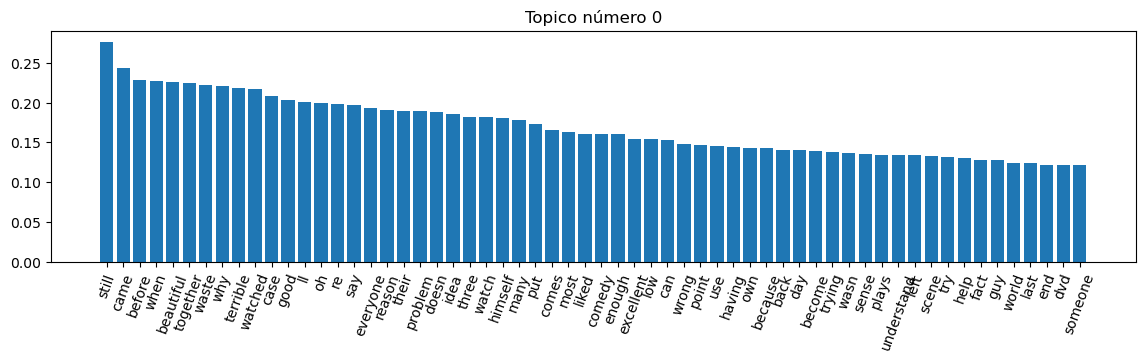

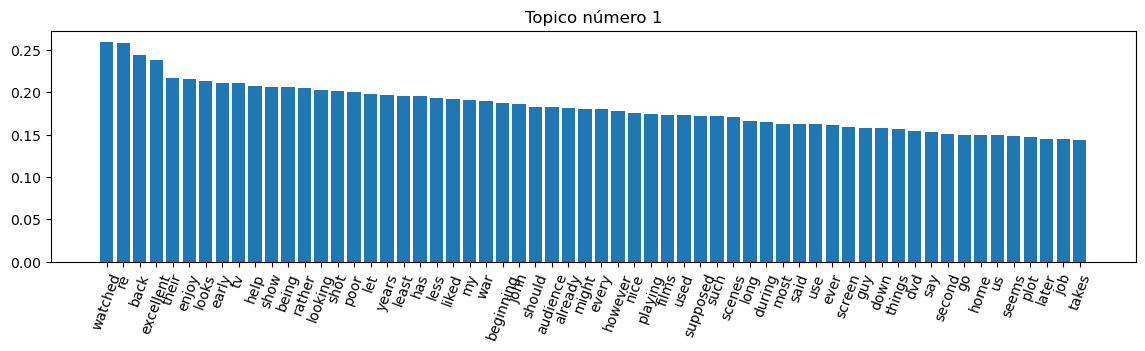

In [72]:
for n in range(n_components):
    tuplas = [ (y[vectorizer.vocabulary_[i],n], i) for i in vectorizer.vocabulary_.keys() ]
    tuplas_ordenadas = sorted(
    tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
    palavras = [ t[1] for t in tuplas_ordenadas ]
    contagens = [ t[0] for t in tuplas_ordenadas ]
    plt.figure(figsize=(14,3))
    eixo_x = np.arange(n_palavras)
    plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
    plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
    plt.title("Topico número " + str(n))
    plt.show()

In [85]:
a1 = nmf.components_[:, vectorizer.vocabulary_['director']]
a2 = nmf.components_[:, vectorizer.vocabulary_['music']]
a3 = nmf.components_[:, vectorizer.vocabulary_['bad']]